<a href="https://colab.research.google.com/github/AlenaPotato/pet_projects/blob/main/search_algorithms/search_algorithms_rus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Во время одного из интервью на позицию аналитика данных мне предложили решить задачу, связанную с алгоритмом бинарного поиска. Такое тестовое мне было предложено впервые и подобные задачи до этого момента я не решала. И на тот момент я не до конца понимала, почему знания алгоритмов могут быть полезны в работе аналитика данных.

Порефлексировав над этим опытом, я решила глубже погрузиться в тему алгоритмов. Оказалось, что они играют важную роль в ряде аспектов аналитической работы:
- Они позволяют находить оптимальные решения для обработки больших объемов данных.
- Понимание алгоритмов способствует лучшему пониманию принципов работы машинного обучения.

Для тренировки алгортмов буду пользоваться той постановкой задачи, какую мне поставили на собеседовании:  есть диапазон значений от 1 до 1,000,000 (случайным образом расположенные). Диапазон включает 1,000 элементов. Задача — найти позицию 5-го числа в отсортированном диапазоне.



# Подготовка

In [44]:
import random
import pandas as pd

l = []
for i in range(1,1001):
  l.append(random.randint(1, 1000000))



In [45]:
l_series = pd.Series(l)
l_series.describe()

,0
count,1000.000000
mean,486026.254000
std,282472.215044
min,960.000000
25%,247909.500000
50%,480730.000000
75%,726245.000000
max,998069.000000


In [46]:
l.sort()
l[:10]

[960, 1729, 3129, 3465, 5308, 5981, 6295, 6627, 10136, 10672]

In [47]:
target = l[4]
target

5308

# Линейный поиск (Linear Search)

Самый простой алгоритм. Суть его заключается в том, что он последовательно проверяет каждый элемент списка до тех пор, пока не найдёт нужный элемент. Если массив данных достаточно небольшой, то этот алгоритм будет сподручен.

In [55]:
for i in range(len(l)):
  if l[i] == target:
    break

print(i, l[i])

4 5308


# Бинарный поиск (Binary Search)

Как раз тот самый алгоритм, про который меня спросили на собеседовании. Как он работает мы вместе с собеседующим сообразили, а вот реализацию довести до конца у меня до конца не вышло.

Алгоритм бинарного поиска работает только на отсортированном диапазоне.

Алгоритм делит диапазон пополам и проверяет, в какой половине находится искомое значение. Затем берёт половину, в которой находится искомое значение, и делит её вновь пополам. Процесс с делением повторяется до тех пор, пока не будет найдена позиция.

In [49]:
end_l = len(l) - 1
start_l = 0
f = 0


while start_l < end_l:
  mid = (start_l + end_l) // 2

  if target == l[mid]:
    f = 1
    break

  elif target < l[mid]:
    end_l = mid - 1

  elif target > l[mid]:
    start_l = mid + 1



print(start_l, end_l)
print(*l[start_l+1: end_l])

3 5
5308


# Алгоритм прыжкового поиска (Jump Search)

Алгоритм прыжкового поиска предназначен для работы с отсортированными массивами. Он представляет собой компромисс между линейным и бинарным поисками, сочетая их лучшие качества. Вместо того чтобы проверять каждый элемент (как в линейном поиске), алгоритм сразу переходит через определённое количество элементов (делает "прыжок"). Если элемент, на который приземлился алгоритм, больше целевого значения, то он возвращается назад и выполняет линейный поиск внутри предыдущего блока. Размер прыжка обычно выбирается равным квадратному корню из длины массива.

In [50]:
import math

step = int(math.sqrt(end_l))  # Определение размера прыжка

# Прыжки по массиву
while l[min(step, end_l)-1] < target:
    start_l, step = step, step*2
    if step >= end_l:
        break

# Линейный поиск внутри блока
for i in range(start_l, min(step, end_l)):
    if l[i] == target:
      break

print(i, l[i])

4 5308


# Интерполяционный поиск (Interpolation Search)

Интерполяционный поиск — более усовершенствованный алгоритм поиска, который работает аналогично бинарному поиску, но делит области не пополам, а в зависимости от расстояния между ключом и текущим значением. Чтобы рассчитать это самое расстоние, алгоритм применяет специальную формулу:

$pos = start_l + \frac{(end_l - start_l)} {(l[end_l] - l[start_l]) * (target - l[start_l])}$



In [51]:
print(f'Индексы: {start_l, end_l}')
print(f'Значения: {l[0], l[end_l]}')
print(f'Цель: {target}')
print(start_l + ((end_l - start_l) // (l[end_l] - l[start_l]) * (target - l[start_l])))

Индексы: (4, 5)
Значения: (960, 5981)
Цель: 5308
4


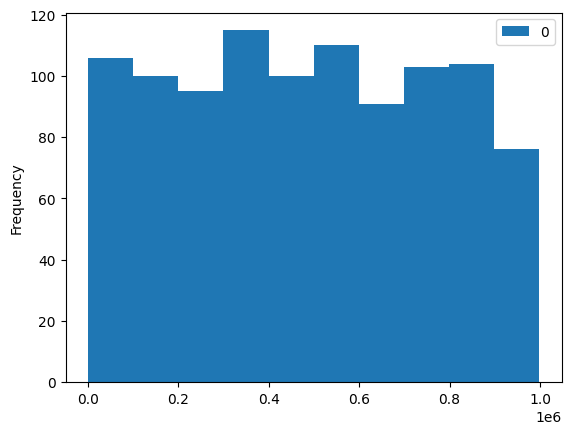

In [52]:
pd.DataFrame(l).plot(kind='hist');

In [53]:
end_l = len(l) - 1
start_l = 0
position = - 1

while start_l <= end_l and target >= l[start_l] and target <= l[end_l]:
    pos = start_l + ((end_l - start_l) // (l[end_l] - l[start_l]) * (target - l[start_l]))

    if l[pos] == target:
        position = pos
        break
    elif l[pos] < target:
        start_l = pos + 1
    else:
        end_l = pos - 1

print(position, l[position])


4 5308


# Экспоненциальный поиск (Exponential Search)

Экспоненциальный поиск используется, если размер массива неизвестен. Алгоритм сначала ищет диапазон, в котором может находиться искомый элемент, увеличивая индекс в экспоненциальной прогрессии, а затем применяет бинарный поиск в найденном диапазоне.

In [54]:
position = -1

if l[0] == target:
    position = 0
else:
    index = 1
    while index < len(l) and l[index] <= target:
        index *= 2

    low = index // 2
    high = min(index, len(l) - 1)

    while low <= high:
        mid = (low + high) // 2
        if l[mid] == target:
            position = mid
            break
        elif l[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

print(position, l[position])


4 5308


# Выводы

В этом проекте я рассмотрела четыре алгоритма поиска: линейный поиск, бинарный поиск, прыжковый поиск, интерполяционный поиск и экспоненциальный поиск. Каждый из этих алгоритмов имеет свои особенности и применяется в разных ситуациях:

- Линейный поиск позволяет последовательно проверить каждый элемент массива, что просто, но неэффективно для больших объемов данных.
- Бинарный поиск значительно ускоряет процесс поиска в отсортированных массивах, разделяя диапазон на половины.
- Прыжковый поиск полезен, когда линейный поиск слишком медленный, а бинарный поиск может быть избыточным.
- Интерполяционный поиск использует свойства линейной интерполяции, что делает его эффективным при равномерном распределении данных.
- Экспоненциальный поиск находит диапазон, в котором может находиться элемент, и затем применяет бинарный поиск внутри этого диапазона.

Каждый из этих алгоритмов по-своему полезен. Знание этих алгоритмов расширяет мои возможности как аналитика, помогая выбирать оптимальные методы для решения различных задач в повседневной работе.